In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
#Here as of now, we can just drop customer id and gender columns.Actually gender column is required. For immediate study purpose,now we're focusing here to 
#create clusters only.

In [4]:
df.shape

(200, 5)

In [5]:
df.size

1000

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
#Dropping 2 columns

#df.drop(['CustomerID','Gender'],inplace=True,axis=1)

In [11]:
#There is no need to seperate the input output. bcs its a unsuprvised ML.So only inputs is here.no output
X =df.iloc[:,2:]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [12]:
#Need to form clustered  depending on Age and Annual income,spending score
#Clustors
#Elbow point

from sklearn.cluster import KMeans
wcss = [] #empty[varience1,varience2 ....varience10]
for i in range(1,11): #1-10  i=1
    data = KMeans(n_clusters=i,init='k-means++',random_state=42) #created object for kMeans
    data.fit(X)
    wcss.append(data.inertia_) #variance as per cluster



In [13]:
wcss

[308812.78,
 221087.19627192983,
 158744.97108013937,
 104366.15145556198,
 97211.84353980474,
 68275.94428646985,
 51448.36126259324,
 44640.028048530425,
 42081.85530868531,
 38378.738907932086]

Text(0.5, 1.0, 'Elbow Points')

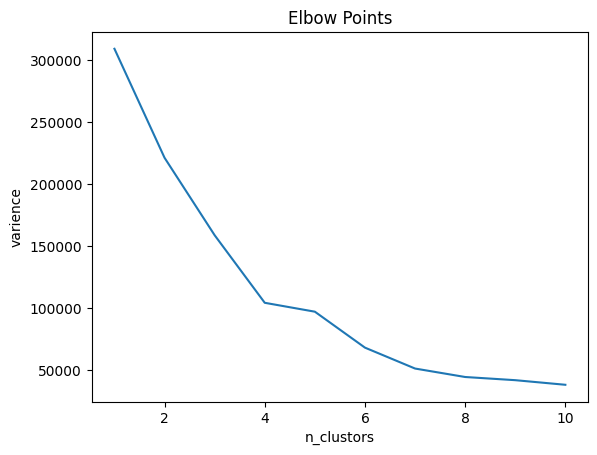

In [14]:
#Find elbow point to check how much clustors choose by checking the constant varience 
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.xlabel('n_clustors')
plt.ylabel('varience')
plt.title('Elbow Points') 

#Here the varience constant from value of clustors from 7.so choosing the number of clustors as 7.

In [15]:
#Genearting 7 clustors from 200 data
data1 = KMeans(n_clusters=7,init='k-means++',random_state=42) #now we know no of clustors 7.so substituting this.
y_pred = data1.fit_predict(X) #
y_pred


array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 5, 2,
       5, 2, 0, 6, 6, 6, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 6,
       0, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 6, 6, 0, 0, 6, 0, 0, 6, 0, 0, 6,
       6, 0, 0, 6, 0, 6, 6, 6, 0, 6, 0, 6, 6, 0, 0, 6, 0, 6, 0, 0, 0, 0,
       0, 6, 6, 6, 6, 6, 0, 0, 0, 0, 6, 6, 6, 4, 6, 4, 6, 4, 3, 4, 3, 4,
       6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [16]:
#Commonly using perofrmace evaluation method for clustors
#1. Silhouette score
#2. Devies-Bouldin index

In [17]:
from sklearn.metrics import silhouette_score,davies_bouldin_score
score = silhouette_score(X,y_pred)
score


0.4420336177238127

In [18]:
score1 = davies_bouldin_score(X,y_pred)
score1

0.768368376547094

In [19]:
#adding new column from output to input X

X['clustor'] = y_pred
X

#Now x having both input and output.

,Age,Annual Income (k$),Spending Score (1-100),clustor
0,19,15,39,5
1,21,15,81,2
2,20,16,6,5
3,23,16,77,2
4,31,17,40,5
...,...,...,...,...
195,35,120,79,1
196,45,126,28,3
197,32,126,74,1
198,32,137,18,3


In [20]:
#Now need to perform supervised ML as need to predict which clustor a new sample came. 

In [21]:
x1 = X.iloc[:,:-1].values
y1 = X.iloc[:,-1].values #Splitting input and output from dataframe X

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x1,y1,test_size=0.30,random_state=42)

In [23]:
#As the algorithm not working based on distance, so no need to do Normalization.KNN,SVM requires Normalization as they're working based on distance.

In [24]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y_pred1 = model.predict(x_test)
y_pred1

array([6, 2, 5, 3, 3, 6, 6, 3, 3, 2, 0, 3, 4, 6, 3, 4, 0, 3, 0, 6, 3, 5,
       3, 6, 6, 0, 6, 0, 4, 6, 2, 5, 0, 6, 3, 0, 4, 4, 3, 0, 0, 1, 5, 5,
       6, 1, 2, 2, 4, 0, 6, 4, 2, 3, 0, 0, 3, 0, 3, 0], dtype=int32)

In [25]:
from sklearn.metrics import accuracy_score
score3 = accuracy_score(y_test,y_pred1)
score3

0.9666666666666667